In [1]:
import os
import numpy as np
import torch

import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [3]:
# define training and test data directories
data_dir = 'dataset/flower_data/'
train_dir = os.path.join(data_dir, 'train/')
test_dir = os.path.join(data_dir, 'valid/')

# classes are folders in each directory with these names
classes = ['pink primrose',
 'hard-leaved pocket orchid',
 'canterbury bells',
 'sweet pea',
 'english marigold',
 'tiger lily',
 'moon orchid',
 'bird of paradise',
 'monkshood',
 'globe thistle',
 'snapdragon',
 "colt's foot",
 'king protea',
 'spear thistle',
 'yellow iris',
 'globe-flower',
 'purple coneflower',
 'peruvian lily',
 'balloon flower',
 'giant white arum lily',
 'fire lily',
 'pincushion flower',
 'fritillary',
 'red ginger',
 'grape hyacinth',
 'corn poppy',
 'prince of wales feathers',
 'stemless gentian',
 'artichoke',
 'sweet william',
 'carnation',
 'garden phlox',
 'love in the mist',
 'mexican aster',
 'alpine sea holly',
 'ruby-lipped cattleya',
 'cape flower',
 'great masterwort',
 'siam tulip',
 'lenten rose',
 'barbeton daisy',
 'daffodil',
 'sword lily',
 'poinsettia',
 'bolero deep blue',
 'wallflower',
 'marigold',
 'buttercup',
 'oxeye daisy',
 'common dandelion',
 'petunia',
 'wild pansy',
 'primula',
 'sunflower',
 'pelargonium',
 'bishop of llandaff',
 'gaura',
 'geranium',
 'orange dahlia',
 'pink-yellow dahlia',
 'cautleya spicata',
 'japanese anemone',
 'black-eyed susan',
 'silverbush',
 'californian poppy',
 'osteospermum',
 'spring crocus',
 'bearded iris',
 'windflower',
 'tree poppy',
 'gazania',
 'azalea',
 'water lily',
 'rose',
 'thorn apple',
 'morning glory',
 'passion flower',
 'lotus lotus',
 'toad lily',
 'anthurium',
 'frangipani',
 'clematis',
 'hibiscus',
 'columbine',
 'desert-rose',
 'tree mallow',
 'magnolia',
 'cyclamen',
 'watercress',
 'canna lily',
 'hippeastrum',
 'bee balm',
 'ball moss',
 'foxglove',
 'bougainvillea',
 'camellia',
 'mallow',
 'mexican petunia',
 'bromelia',
 'blanket flower',
 'trumpet creeper',
 'blackberry lily']

len(classes)

102

In [4]:
# load and transform data using ImageFolder

# VGG-16 Takes 224x224 images as input, so we resize all of them
data_transform = transforms.Compose([transforms.Resize(224),
                                   transforms.RandomResizedCrop(224),
                                   transforms.RandomHorizontalFlip(),
                                   transforms.RandomRotation(10),
                                   transforms.ToTensor(),
                                   transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

train_data = datasets.ImageFolder(train_dir, transform=data_transform)
test_data = datasets.ImageFolder(test_dir, transform=data_transform)

# print out some data stats
print('Num training images: ', len(train_data))
print('Num test images: ', len(test_data))

Num training images:  6552
Num test images:  818


In [5]:
# define dataloader parameters
batch_size = 64
num_workers=0

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
                                          num_workers=num_workers, shuffle=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

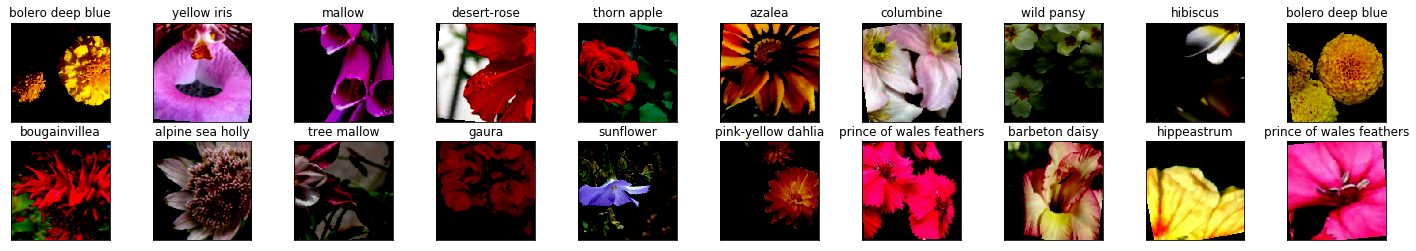

In [6]:
# Visualize some sample data

# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(classes[labels[idx]])

In [7]:
# get models here https://pytorch.org/docs/stable/torchvision/models.html
# Load the pretrained model from pytorch
# vgg16 = models.vgg19_bn(pretrained=True)

vgg16 = models.resnet152(pretrained=True)
vgg16.aux_logits=False

# print out the model structure
print(vgg16)



ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [8]:
for param in vgg16.conv1.parameters():
    param.requires_grad = False
    
for param in vgg16.bn1.parameters():
    param.requires_grad = False
    
for param in vgg16.relu.parameters():
    param.requires_grad = False
    
for param in vgg16.maxpool.parameters():
    param.requires_grad = False
    
for param in vgg16.layer1.parameters():
    param.requires_grad = False
    
    #
for param in vgg16.layer2.parameters():
    param.requires_grad = False
    
for param in vgg16.layer3.parameters():
    param.requires_grad = False
    
for param in vgg16.layer4.parameters():
    param.requires_grad = False
    
for param in vgg16.avgpool.parameters():
    param.requires_grad = False
    


In [9]:
print("In Feature ",vgg16.fc.in_features) 
print("Out feature: ",vgg16.fc.out_features) 


In Feature  2048
Out feature:  1000


In [10]:
import torch.nn as nn
import torch.nn.functional as F

n_inputs = vgg16.fc.in_features

# add last linear layer (n_inputs -> 5 flower classes)
# new layers automatically have requires_grad = True
# print(len(classes)," Classes Found")

dropout = nn.Dropout(p=0.3)
last_layer = nn.Linear(n_inputs,1024 ,bias=True)
fc_out = nn.Linear(1024,len(classes),bias=True)

vgg16.fc = last_layer
vgg16.add_module ('dropout',nn.Dropout(p=0.5))
vgg16.add_module ("fc_out",fc_out)

# if GPU is available, move the model to GPU
if train_on_gpu:
    vgg16.cuda()

# check to see that your last layer produces the expected number of outputs
print("Out feature: ",vgg16.fc.out_features) 
print(vgg16)



# for param in vgg16.features.parameters():
#     param.requires_grad = False
    
# print("In Feature ",vgg16.classifier[6].in_features) 
# print("Out feature: ",vgg16.classifier[6].out_features) 

# import torch.nn as nn

# n_inputs = vgg16.classifier[6].in_features

# # add last linear layer (n_inputs -> 5 flower classes)
# # new layers automatically have requires_grad = True
# # print(len(classes)," Classes Found")
# last_layer = nn.Linear(n_inputs, len(classes))

# vgg16.classifier[6] = last_layer

# # if GPU is available, move the model to GPU
# if train_on_gpu:
#     vgg16.cuda()

# # check to see that your last layer produces the expected number of outputs
# print("Out feature: ",vgg16.classifier[6].out_features) 

Out feature:  1024
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), st

In [11]:
import torch.optim as optim

# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer (stochastic gradient descent) and learning rate = 0.001
optimizer = optim.Adam(vgg16.fc.parameters(), lr=0.001)

In [12]:
# torch.cuda.empty_cache()
# torch.cuda.is_available()
vgg16.load_state_dict(torch.load('model_best_resnet152.pt'))

FileNotFoundError: [Errno 2] No such file or directory: 'model_best_resnet152.pt'

In [43]:
# number of epochs to train the model

n_epochs = 100
valid_loss_min = np.Inf 

for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    vgg16.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = vgg16(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
        
    ######################    
    # validate the model #
    ######################
    vgg16.eval()
    for batch_idx, (data, target) in enumerate(test_loader):
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = vgg16(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # update average validation loss 
        valid_loss += loss.item()*data.size(0)
    
    # calculate average losses
    train_loss = train_loss/len(train_loader.dataset)
    valid_loss = valid_loss/len(test_loader.dataset)
        
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(vgg16.state_dict(), 'model_best_resnet152.pt.pt')
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 3.170070 	Validation Loss: 1.698304
Validation loss decreased (inf --> 1.698304).  Saving model ...
Epoch: 2 	Training Loss: 1.408110 	Validation Loss: 1.101353
Validation loss decreased (1.698304 --> 1.101353).  Saving model ...
Epoch: 3 	Training Loss: 1.009322 	Validation Loss: 0.906764
Validation loss decreased (1.101353 --> 0.906764).  Saving model ...
Epoch: 4 	Training Loss: 0.800047 	Validation Loss: 0.777439
Validation loss decreased (0.906764 --> 0.777439).  Saving model ...
Epoch: 5 	Training Loss: 0.733252 	Validation Loss: 0.691612
Validation loss decreased (0.777439 --> 0.691612).  Saving model ...
Epoch: 6 	Training Loss: 0.675307 	Validation Loss: 0.696233
Epoch: 7 	Training Loss: 0.614590 	Validation Loss: 0.642046
Validation loss decreased (0.691612 --> 0.642046).  Saving model ...
Epoch: 8 	Training Loss: 0.563059 	Validation Loss: 0.611426
Validation loss decreased (0.642046 --> 0.611426).  Saving model ...
Epoch: 9 	Training Loss: 0.533947 

In [13]:
vgg16.load_state_dict(torch.load('model_best_resnet152.pt.pt'))

In [16]:


# track test loss
test_loss = 0.0
class_correct = list(0. for i in range(102))
class_total = list(0. for i in range(102))

vgg16.eval()
# iterate over test data
for batch_idx, (data, target) in enumerate(train_loader):
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = vgg16(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    # calculate test accuracy for each object class
    for i in range(len(data)):
#         print(len(target),i)
        x = target.data[i]
        label = x
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# average test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(102):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 2.307471

Test Accuracy of pink primrose: 81% (22/27)
Test Accuracy of hard-leaved pocket orchid: 97% (37/38)
Test Accuracy of canterbury bells: 94% (33/35)
Test Accuracy of sweet pea: 87% (43/49)
Test Accuracy of english marigold: 100% (36/36)
Test Accuracy of tiger lily: 89% (61/68)
Test Accuracy of moon orchid: 97% (71/73)
Test Accuracy of bird of paradise: 94% (36/38)
Test Accuracy of monkshood: 100% (44/44)
Test Accuracy of globe thistle: 89% (34/38)
Test Accuracy of snapdragon: 97% (35/36)
Test Accuracy of colt's foot: 100% (60/60)
Test Accuracy of king protea: 92% (60/65)
Test Accuracy of spear thistle: 94% (36/38)
Test Accuracy of yellow iris: 100% (49/49)
Test Accuracy of globe-flower: 86% (40/46)
Test Accuracy of purple coneflower: 97% (33/34)
Test Accuracy of peruvian lily: 85% (40/47)
Test Accuracy of balloon flower: 86% (62/72)
Test Accuracy of giant white arum lily: 97% (34/35)
Test Accuracy of fire lily: 94% (32/34)
Test Accuracy of pincushion flower: 93% (31/

In [ ]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()
images.numpy()

# move model inputs to cuda, if GPU available
if train_on_gpu:
    images = images.cuda()

# get sample outputs
output = vgg16(images)
# convert output probabilities to predicted class
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy()) if not train_on_gpu else np.squeeze(preds_tensor.cpu().numpy())

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]),
                 color=("green" if preds[idx]==labels[idx].item() else "red"))